# A quick tutorial of taking numerical derivative of noisy data with PyNumDiff

This notebook walks through each of the methods implemented in PyNumDiff.

### Notations:
  * dt: (float) time step
  * x: (np.array with length N) the noisy time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is accessible when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is accessible when the data is simulated, and used for plotting purposes only)

In [6]:
import os
import sys
import time
import numpy as np

# local import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pynumdiff

simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

%matplotlib inline

## 0. Simulate synthetic data

### PyNumDiff comes with 6 different toy problems:
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dx/dt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [7]:
# simulation parameters

# noise is generated using np.random, e.g. 'normal', 'uniform', 'poisson'
# noise_type and noise_parameters should be compatible with np.random functions 

noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4

In [8]:
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

## 1. Finite Difference

### 1.1 Finite Difference: First Order

RMS error in velocity:  6.820305856536253


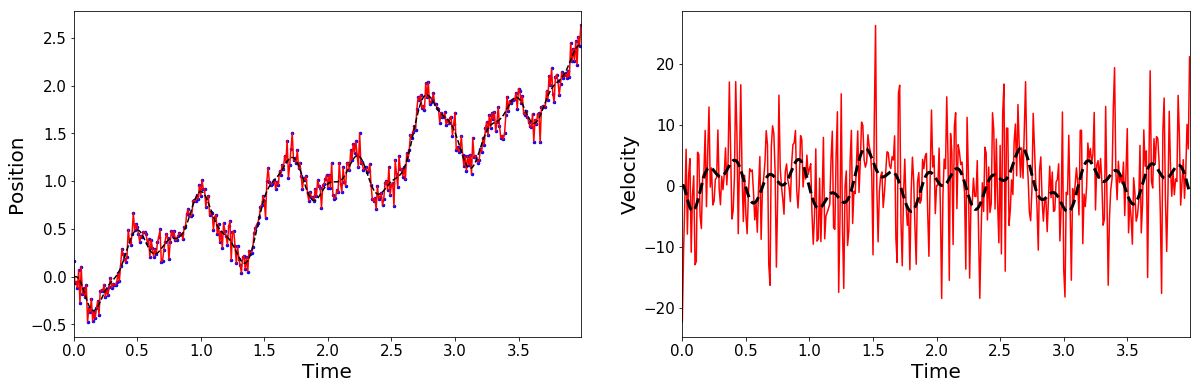

In [9]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 Finite Difference: Second Order

RMS error in velocity:  6.820305856536253


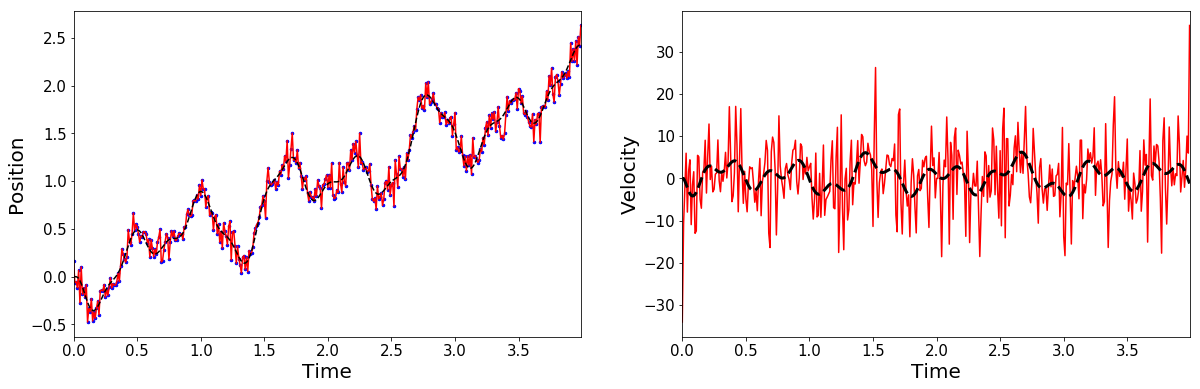

In [10]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Finite Difference: Iterated First Order

RMS error in velocity:  0.8106946044490604


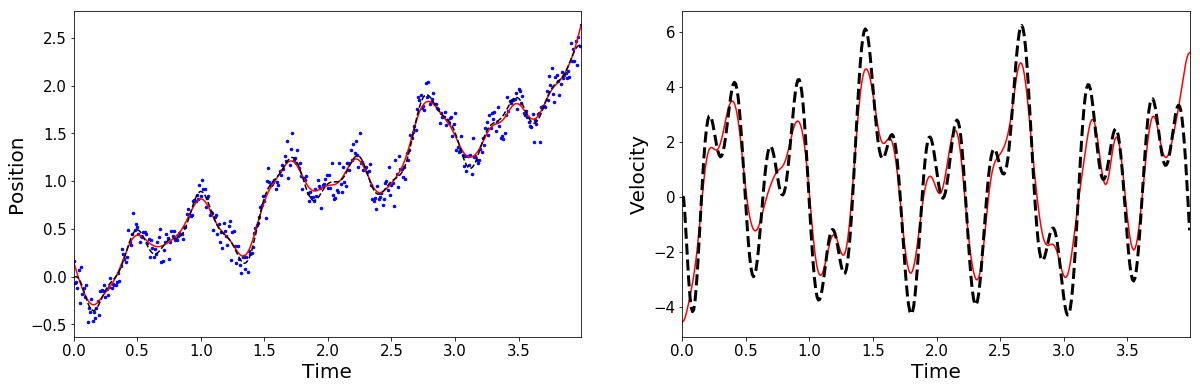

In [7]:
params = [50]
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

RMS error in velocity:  1.7921026453896767


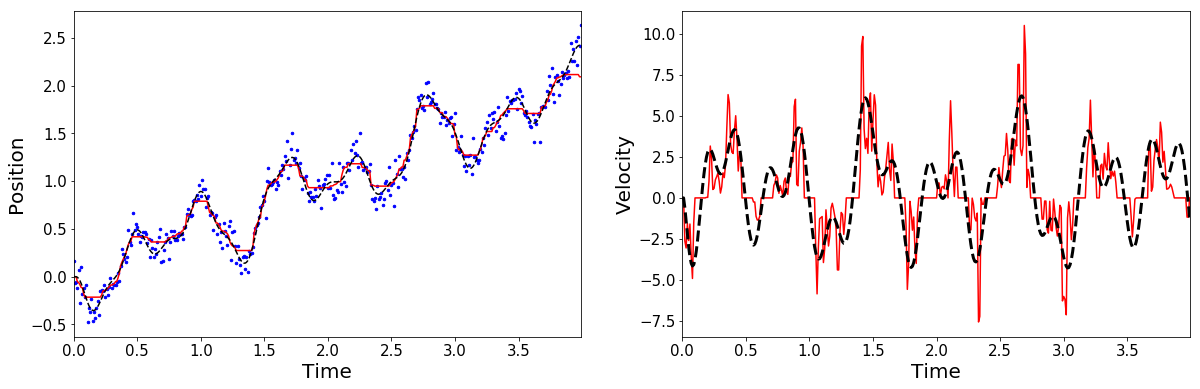

In [8]:
params = [20, 4]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.2 Smooth Finite Difference: Mean smoothing

RMS error in velocity:  1.1639595851534268


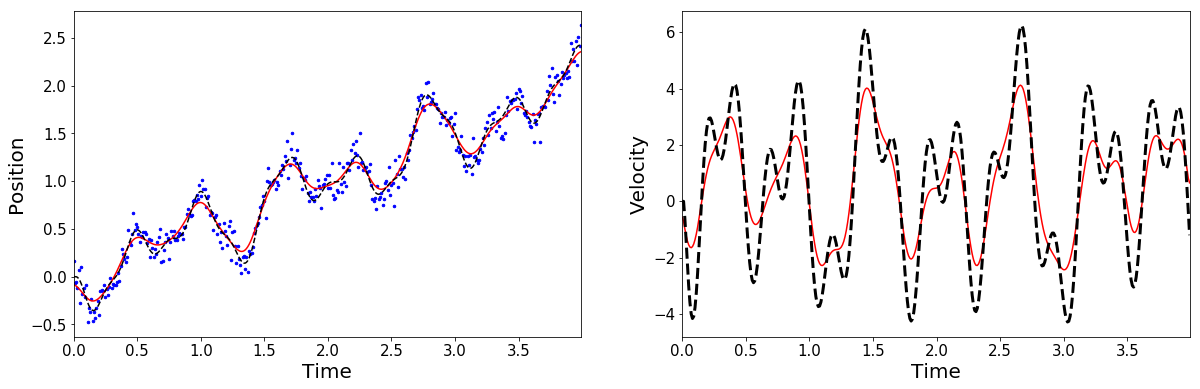

In [9]:
params = [10, 5]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.3 Smooth Finite Difference: Gaussian smoothing

RMS error in velocity:  0.630671459152812


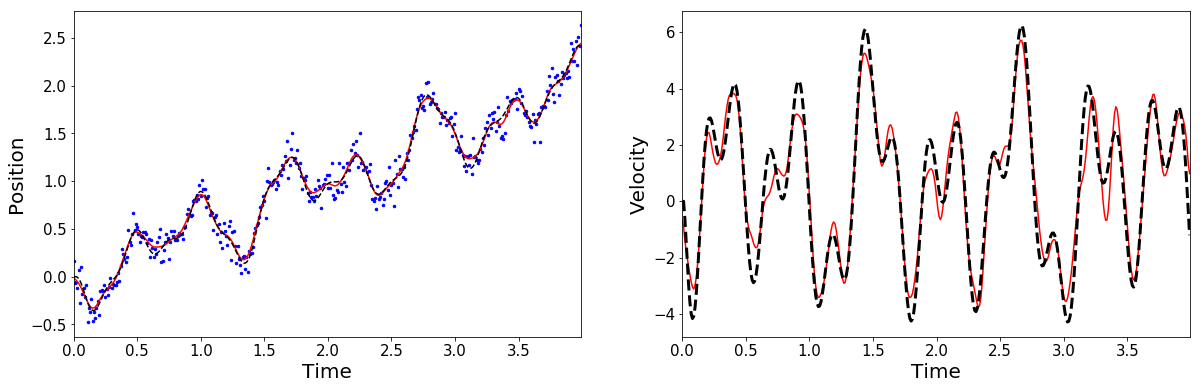

In [10]:
params = [20]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.4 Smooth Finite Difference: Friedrichs smoothing

RMS error in velocity:  1.1747725326040823


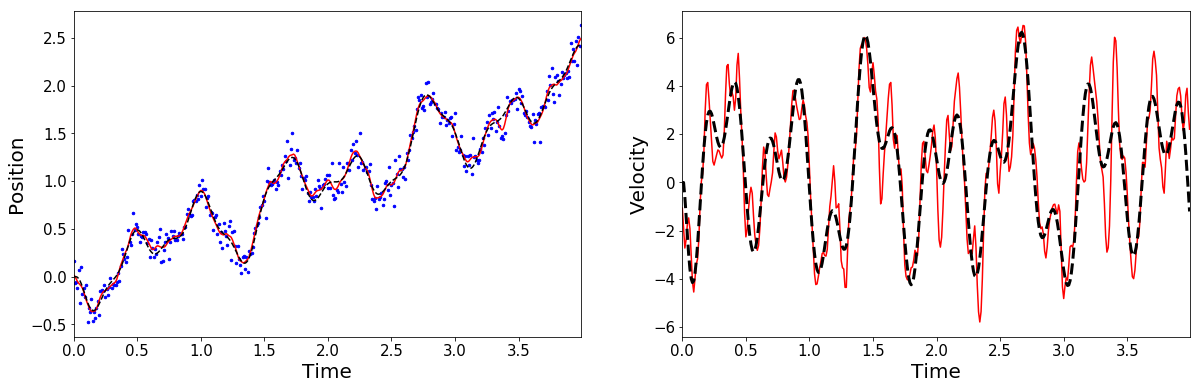

In [11]:
params = [10]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.5 Smooth Finite Difference: Butterworth smoothing

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


RMS error in velocity:  0.5346838306007065


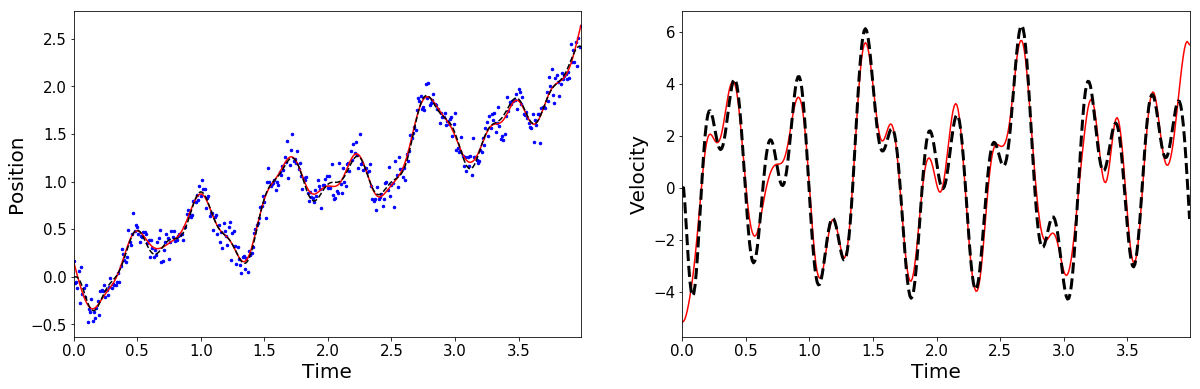

In [12]:
params = [3, 0.09]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.6 Smooth Finite Difference: Spline smoothing

RMS error in velocity:  1.580350387895086


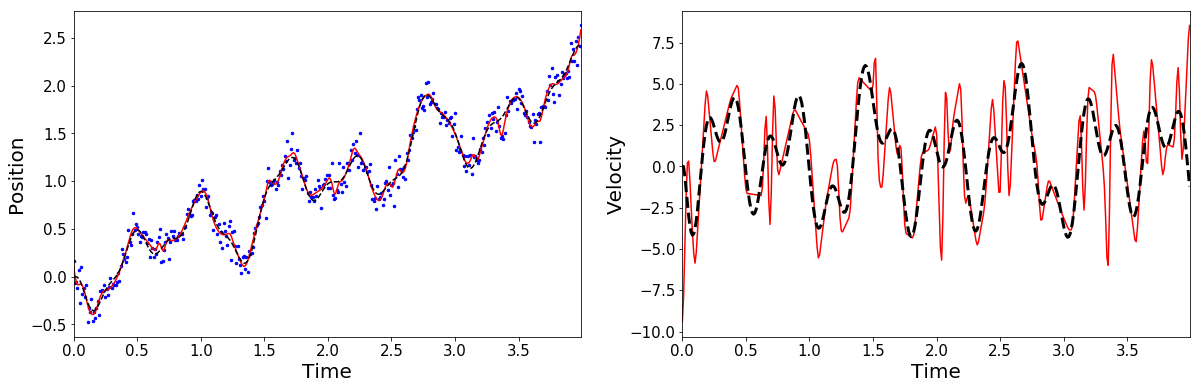

In [13]:
params = [2, 3]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 3. Total Variation Regularization

### 3.1 Iterative Total Variation Regularization (regularized velocity)

RMS error in velocity:  0.8332161940233828


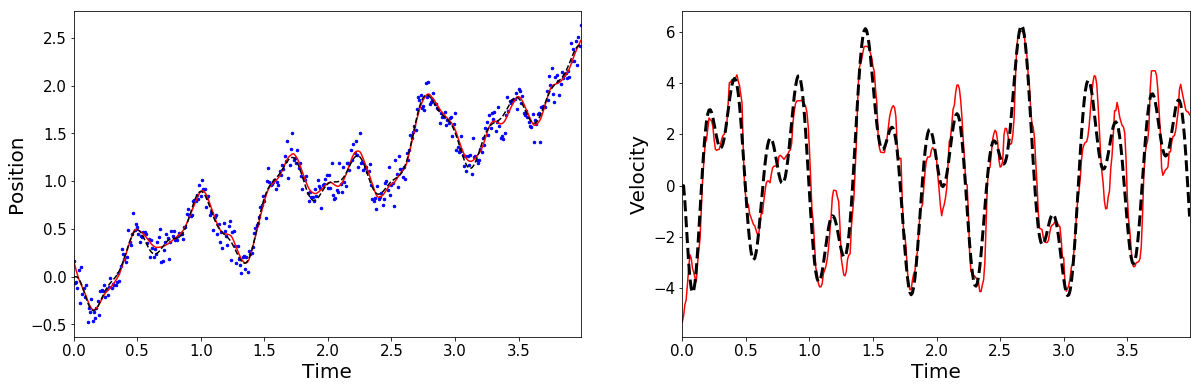

In [14]:
params = [1, 0.001]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Convex Total Variation Regularization: regularize velocity

RMS error in velocity:  0.9552195586508875


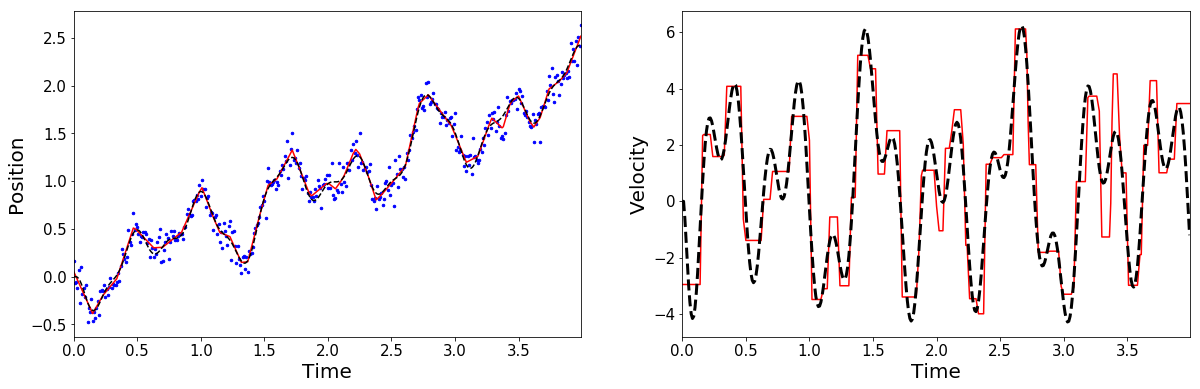

In [15]:
params = [1]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Convex Total Variation Regularization: regularize acceleration

RMS error in velocity:  0.9090619568001699


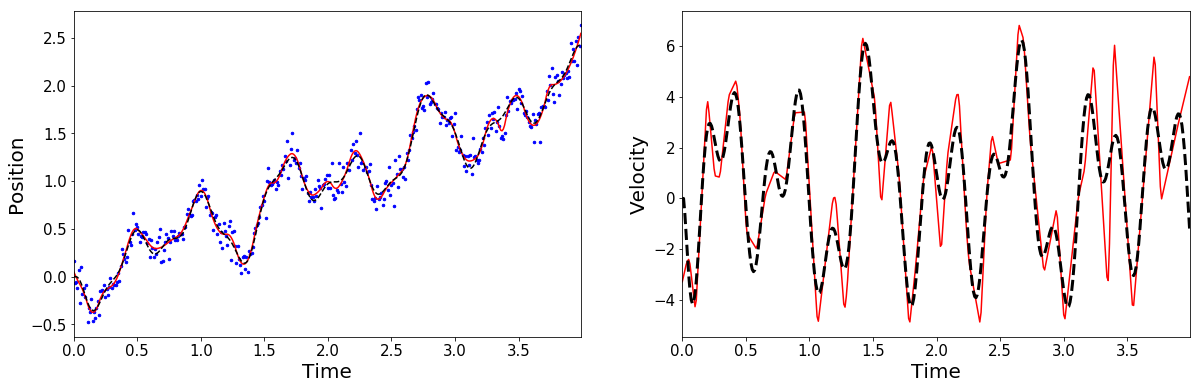

In [16]:
params = [1]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.4  Convex Total Variation Regularization: regularize jerk

RMS error in velocity:  0.5753405569591497


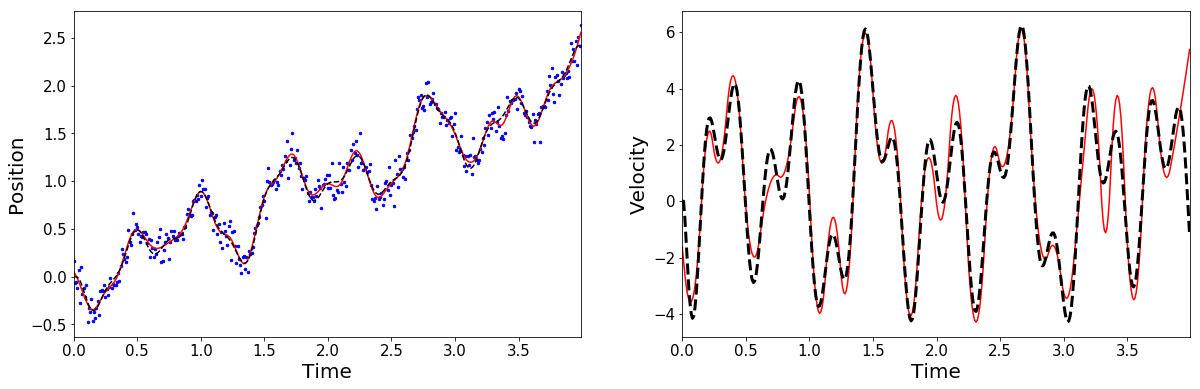

In [17]:
params = [10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.5 Convex Total Variation Regularization: regularize acceleration with gaussian smoothing

RMS error in velocity:  0.7264088447920175


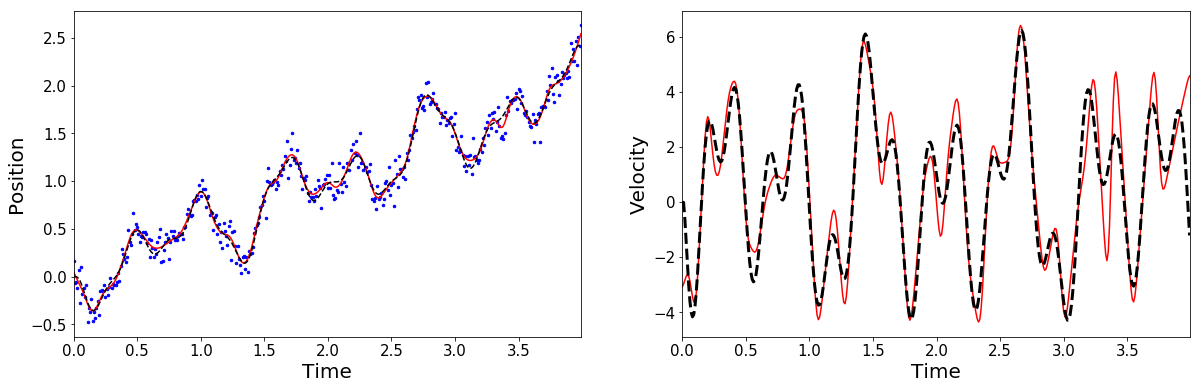

In [18]:
params = [1, 10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 4. Linear Models

### 4.1 Linear Models: Spectral derivative

RMS error in velocity:  0.6000785062126386


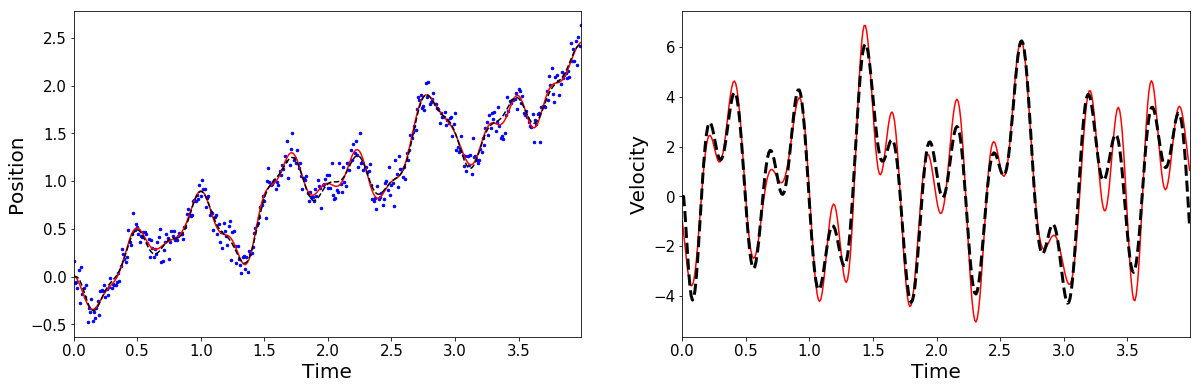

In [19]:
params = [0.05]
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Linear Models: Sliding polynomial fit

RMS error in velocity:  0.7733512026035322


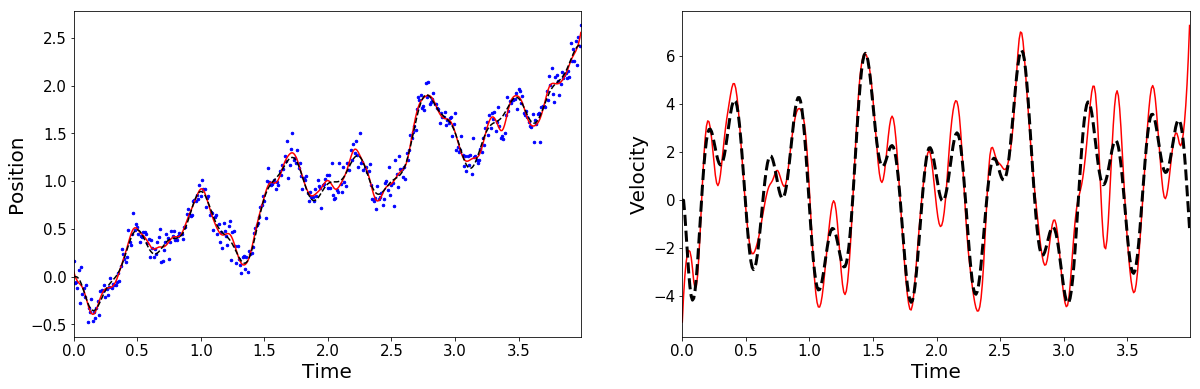

In [20]:
params = [2, 20]
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 Linear Models: Savitzky-Golay filter

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


RMS error in velocity:  0.6695320553291175


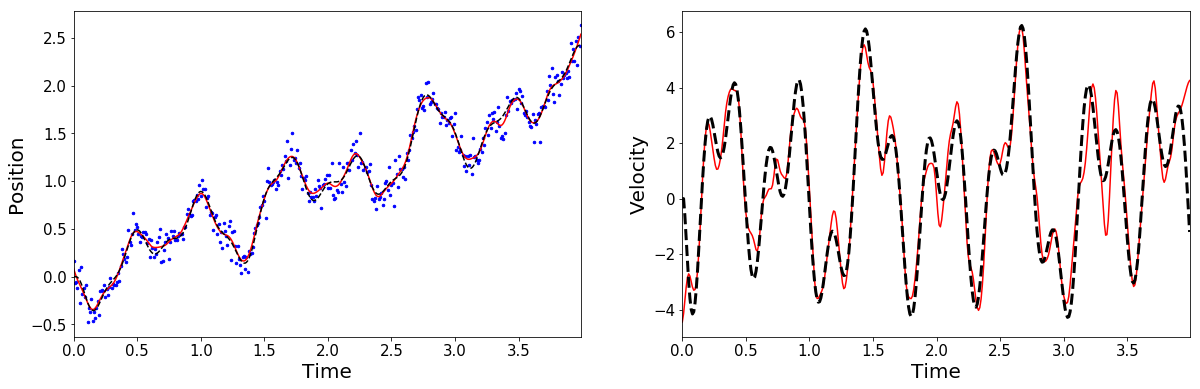

In [21]:
params = [2, 10, 10]
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.4 Linear Models: Sliding chebychev polynomial fit

RMS error in velocity:  0.8035432767198158


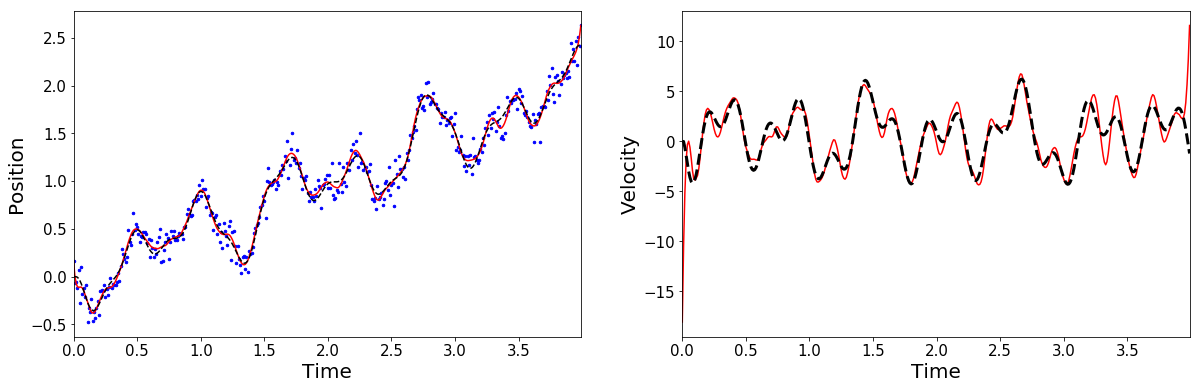

In [22]:
params = [2, 20]
x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.5 Linear Models: Sliding linear time invariant system fit

In [5]:
params = [3, 10, 20]
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

ValueError: cannot reshape array of size 30 into shape (1,3)

## Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

RMS error in velocity:  0.5509729084067391


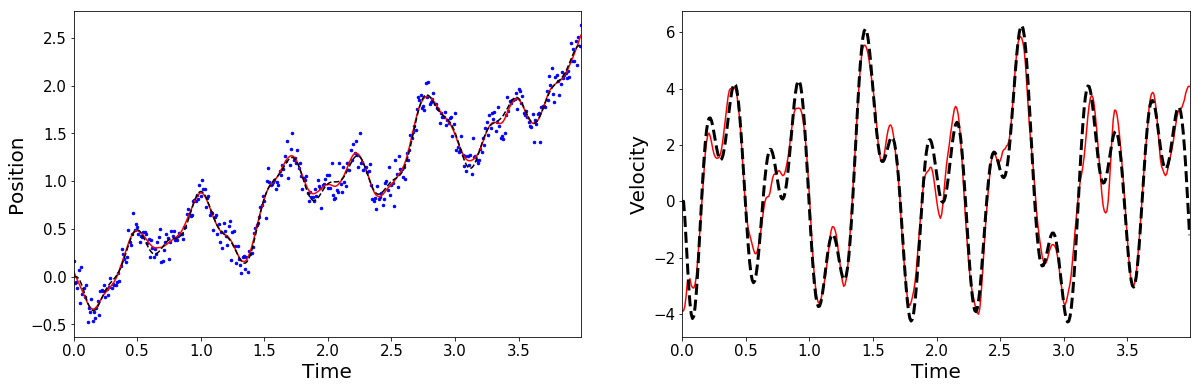

In [5]:
params = [noise_parameters[1]**2, 1e-0]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity( x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

RMS error in velocity:  0.5130773927684749


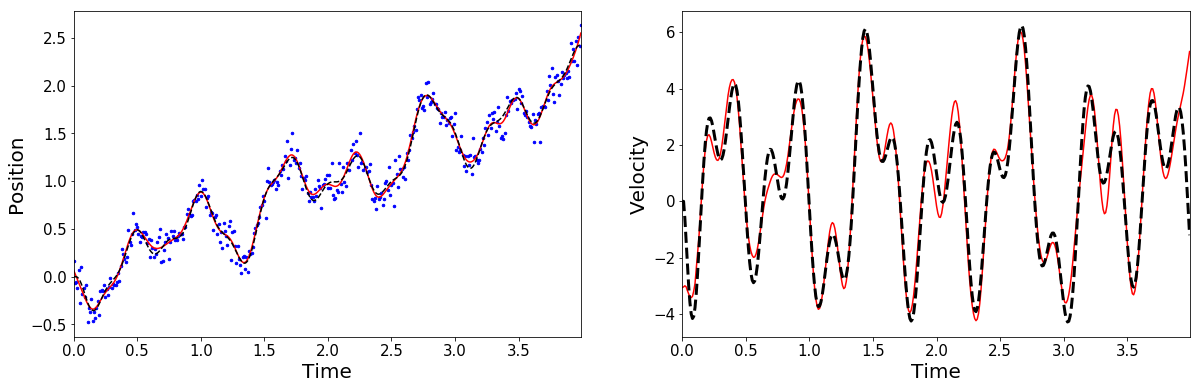

In [6]:
params = [noise_parameters[1]**2, 1e3]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

RMS error in velocity:  0.5264689715990928


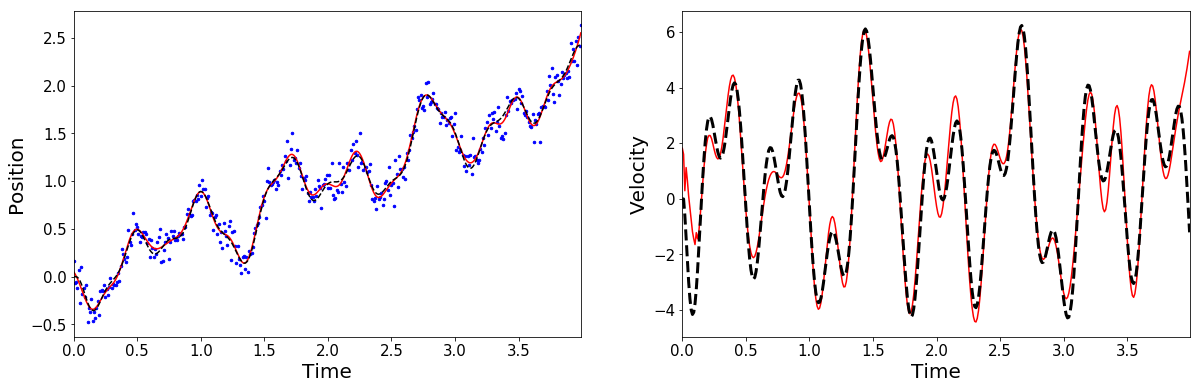

In [7]:
params = [noise_parameters[1]**2, 1e6]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)